# Convolutional Layer

## References

- [How Do Convolutional Layers Work in Deep Learning Neural Networks?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)
- [A Gentle Introduction to Pooling Layers for Convolutional Neural Networks](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/)

Image from [Wikipedia: Line Detection](https://en.wikipedia.org/wiki/Line_detection)


In [19]:
from PIL import Image, ImageOps
from IPython.display import display

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input

## Getting data to feed the model

### Open and display the image using PIL

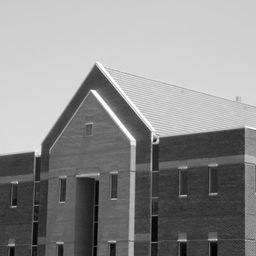

In [20]:
img = Image.open('Testbuilding.jpg')
img = ImageOps.grayscale(img)
display(img)

### Convert the image to a numpy array

In [21]:
numpy_img = np.asarray(img)
numpy_img.shape

(256, 256)

### Prepare the array to feed the model

Add dimensions:
- The model consumes sequences of images, in this case the length of the sequence is 1.
- The model also requires channels. A color image has 3 channels, in this case our image is grayscale with a single channel.

The image shape is (256,256). To feed the model we need (1,256,256,1): a single image with dimensions 256x56 and a single channel.

In [22]:
ni_reshaped = numpy_img.reshape(1,256,256,1)
ni_reshaped.shape

(1, 256, 256, 1)

## Convolutional layers

To create a convolution layer we use the Conv2D function in the layers module from Keras.

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

The most used parameters are:

- filters: the number of filters in the layer

- kernel_size: the kernel's dimensions. 3x3 and 5x5 are common values.

- strides: the filter is applied across the image. The shift defined in the stride defines how many pixels to jump both horizontally and vertically. By default this value is (1,1) meaning that the filter is applied to all pixels in the image. Larger strides lead to a smaller output.

- padding: when applying a filter to an image an issue arises with the pixels in the border. If the filter is applied only to the inner pixels the result will be an image with dimensions $(w - floor(fs/2), h - floor(fs/2))$, where floor is a function that truncates the argument, $fs$ is the filter size (assuming a square filter) and $w$ and $h$ are the original image dimensions. 
To preserve the image dimension we can pad the image array with zeros such that the kernel can be applied to the borders of the original image. Default value is 'valid' which will produce a smaller output image. To preserve the image dimensions use 'same'

Examples:

```
Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same') 
```

As these are the first four parameters in the Conv2D function, and are in the right order, we can omit the keywords, resulting in:
```
Conv2D(16, (3,3), (1,1), 'same')
```

Since above we are using the default stride values we can write:

```
Conv2D(16, (3,3), padding='same')
```

## Create a model with a single convolutional layer

Using the sequential API, we first create a new empty model

```
model = Sequential()
```
Then we define the input shape
```
model.add(Input(shape=(256,256,1)))
```
Finally we add a convolutional layer with a single kernel 3x3, keeping the input's dimensions (padding='same')
```
model.add(Conv2D(1, (3,3), padding='same'))
```

In [23]:
model = Sequential()
model.add(Input(shape=(256,256,1)))
model.add(Conv2D(1, (3,3), padding='same'))

## Define a kernel for the convolution 

In general the kernel weights are learned, but in here we are setting the weights manually to a vertical line detector



-1 2 -1

-1 2 -1

-1 2 -1


In [24]:
kernel = [[[[-1]],[[2]],[[-1]]],
            [[[-1]],[[2]],[[-1]]],
            [[[-1]],[[2]],[[-1]]]]     


### Set the weights for the kernel in the model

The ```set_weights``` receives a list with the weights and biases

Note: the bias weight is set to zero



In [25]:
# set weights and bias                   
weights = [np.asarray(kernel), np.asarray([0.0])]

# set the model weights
model.layers[0].set_weights(weights)

## Feed the model with the image

The model is fed with a set of images (recall the reshape done previously)

The output is the result of applying the model to each of the input images, hence it is also a list of images, although we have only one image.

In [27]:
pred = model.predict(ni_reshaped)
print(pred.shape)
print(pred[0][:,:, 0].shape)
print(type(pred))


1/1 [==============================] - 3s 3s/step
(1, 256, 256, 1)
(256, 256)
<class 'numpy.ndarray'>


### Convert the result (a numpy array)  no formato de imagem para efeitos de visualização

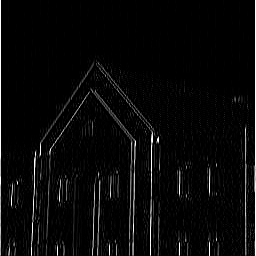

In [29]:
# clipping ensures that the pixel values are in the correct range
img_res = np.clip(pred[0][:,:, 0], 0, 255)
# convert numpy array to an an image
result = Image.fromarray(np.uint8(img_res), 'L')
display(result)

## Creating a model with two convolutional filters

Adding a second filter that detects horizontal lines

-1 -1 -1

 2  2  2

-1 -1 -1

A new model is created with two filters, and the weights are loaded to the model with both the vertical and horizontal line detectors. Note that the number of biases is equal to the number of filters.

In [45]:

model2 = Sequential()
model2.add(Input(shape=(256,256,1)))
model2.add(Conv2D(2, (3,3), padding = 'same'))

detector2 = [[[[-1, -1]],[[2, -1]],[[-1, -1]]],
            [[[-1, 2]],[[2, 2]],[[-1, 2]]],
            [[[-1, -1]],[[2, -1]],[[-1, -1]]]]  


weights = [np.asarray(detector2), np.asarray([0.0, 0.0])]
model2.set_weights(weights)


### Feed the model with the image

Since there are two filters, the model outputs an image with two channels


In [49]:
pred2 = model2.predict(ni_reshaped)
print(pred2.shape)

1/1 [==============================] - 3s 3s/step
(1, 256, 256, 2)


### Visualizing the results for each filter

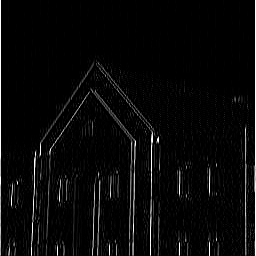

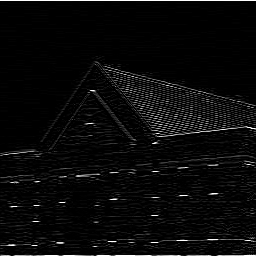

In [51]:

img_res = np.clip(pred2[0][:,:, 0], 0, 255)
result0 = Image.fromarray(np.uint8(img_res), 'L')

img_res = np.clip(pred2[0][:,:, 1], 0, 255)
result1 = Image.fromarray(np.uint8(img_res), 'L')

display(result0)
display(result1)